<h1><center><b> Acquired Intelligence & Adaptive Behaviour </b></center></h1>
<h2><center><i>An optimisation algorithm (Lab Sheet 02) </i></center></h2>


**Goal**: In this notebook we will start by implementing a population of hill climbers to solve a resource allocation (or knapsack) problem. We will then contruct the full microbial GA presented in lectures. This will involve designing a suitable fitness function and selection method. You will investigate the effects of hyperparameters such as mutation rate. 



# Knapsack problem

The knapsack (KP) problem is an example of a combinatorial optimization problem, refer to the [wiki](https://en.wikipedia.org/wiki/Knapsack_problem) for a broader overview. 

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Knapsack.svg/250px-Knapsack.svg.png" width="200"></center>

It is concerned with a knapsack that has positive integer volume (or capacity) $V$. For instance, the knapsack may be able to store 20 cubic inches. There are $N$ distinct items that may potentially be placed in the knapsack. Item $i$ has a positive integer
volume $Vi$ (e.g this object is 8 cubic inches) and positive integer benefit $Bi$ (e.g how benefical is it to have this object in the knapsack). In the most basic form of the problem we will consider there are only one of each item available (0-1 KP).

The goal is to maximize benefit:

$$
\sum_i^N B_i
$$

Subject to the constraint that:

$$
\big ( \sum_i^N V_i \big) \leq  V
$$

For example suppose we have a knapsack that has a capacity of 20 cubic inches ($V$) and $N=10$ items of different sizes and different benefits. We want to include in the knapsack only these
items that will have the greatest total benefit within the constraint of the knapsack’s capacity.

```
item        a b c d e f g  h i j
Benefit (B) 5 6 1 9 2 8 4  3 7 10
Volume (V)  3 2 4 5 8 9 10 1 6 7
```


# Hill climbing agent
**Background**: Hill climbers may be used to find solutions to a wide variety of problems. Each hill climbing individual increases its fitness through trial and error:

1. Create a random individual
2. Change (mutate) the individual 
3. Measure how good this individual is for some task (fitness)
4. If it's worse than before, keep the original individual. Otherwise, keep the changed individual.
5. Goto 2


Our  algorithms will be composed of four components:

1. **Genotype**: a list of numbers which encode information about task solutions, representing an indvidual
2. **Genotype to phenotype mapping**: How should the genotype be interpreted as encoding a solution to our problem? This is analogous to the development of an organism from birth to adulthood. However, for this current problem, this should turn out to be quite trivial.
3. **Fitness function**: We need a way to evaluate how good each phenotype is as a potential solution to the card-sorting problem. How might this be implemented? 
4. A method for **mutation**. Is it necessary to allow random changes in the offspring produced by reproduction in order to maintain variability. 

> **Task**: Code a single hill climbing individuals to solve the above task. Implement your
algorithm in full and run it for at least 100 generations (i.e. repetitions of the algorithm).
Recording the fitness at each generation. Plot the fitness versus the generation number.
Have you found a solution? Try changing the mutation rate and observe the effects.

**Tips**:
- Code an individual as a single vector, using binary digits (0 or 1) for each gene. Each digit represents whether the corresponding object is being included in the knapsack. Below is an example of how to generate this in python:



In [ ]:
import numpy as np

# number of items in our problem
num_items = 10

# hill climbing genotype
genotype = np.random.choice([0, 1], (num_items))
print(genotype)

[0 1 0 0 0 0 0 1 1 0]


* There are several ways in which you can encode the problem itself (the volumes and benefit of each object). It may be useful to store these values as an array:

In [ ]:
import numpy as np

max_volume = 20
benefits = np.array([5, 6, 1, 9, 2, 8, 4, 3, 7, 10])
volumes = np.array([3, 2, 4, 5, 8, 9, 10, 1, 6, 7])
print(benefits)
print(volumes)

[ 5  6  1  9  2  8  4  3  7 10]
[ 3  2  4  5  8  9 10  1  6  7]


* The fitness function should return a _single number_ which quantifies how close to the ideal solution a phenotype is. Below is a rough example of what this function should look like:

In [ ]:
def fitness_function(genotype, benefits, volumes, max_volume):
    # put you fitness calculuations here
    fitness = 0
    vol = 0
    for i in range(len(genotype)):
      if genotype[i] == 1:
        fitness += benefits[i]
        vol += volumes[i]
      if max_volume < vol:
        return 0
    return fitness # a single number saying how good the geneotype is

* Implement your mutation by selecting a random gene (e.g by picking a random number between 1 and 10) and then flipping the number (0 to 1 or 1 to 0). 

* Overwrite the current individual if the new indvidual is better.

**You will need to integrate these features into a loop which performs the genetic algorithm detailed above**.

In [ ]:
fit = fitness_function(genotype, benefits, volumes, max_volume)
print(fit)

16


In [ ]:
import random
def mutation(num, genotype):
  print("None mutated" ,genotype)
  fit = fitness_function(genotype, benefits, volumes, max_volume)
  size = len(genotype)
  current_genotype = np.copy(genotype)
  for i in range(num):
    rand = random.randint(0,size-1)
    if current_genotype[rand] == 1:
      current_genotype[rand] = 0
    else:
      current_genotype[rand] = 1
  print("Mutated", current_genotype)
  new_fit = fitness_function(current_genotype, benefits, volumes, max_volume)
  print("new_fit is :", new_fit, "old_fit is:", fit)
  if new_fit > fit and new_fit != 0:
    return current_genotype, new_fit
  return genotype, fit
    

In [ ]:
print(mutation(1, genotype))

None mutated [0 1 0 0 0 0 0 1 1 0]
Mutated [0 1 1 0 0 0 0 1 1 0]
new_fit is : 17 old_fit is: 16
(array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0]), 17)


> **Task**: Code a population of hill climbers that attempt to solve the task in parallel. Plot the fitness of the hillclimbers versus the number of tournaments. How many individuals are successful for each run. Is a population of hill climbers less or more computational expensive? What happens when you make the problem bigger or change the problem.


**Tips**:
- For a population of hill climbers code many individuals in a matrix and keep fitness values in vector:

In [ ]:
import numpy as np 

num_genes = 10
num_individuals = 5 # you probably want more than 5, this is just for plotting

genotypes = np.random.choice([0, 1], (num_individuals, num_items))
fitness = np.zeros(num_individuals)

print(f"All genotypes: \n{genotypes}")
print(f"Genotype 3: {genotypes[3, :]}")
print(f"Genotype 1 gene 7: {genotypes[3, 7]}")

All genotypes: 
[[0 1 1 0 0 0 1 0 0 1]
 [1 1 0 1 1 0 0 0 1 1]
 [1 1 1 1 1 0 1 1 0 0]
 [1 1 0 0 0 0 1 0 1 0]
 [1 1 0 1 0 1 1 1 0 0]]
Genotype 3: [1 1 0 0 0 0 1 0 1 0]
Genotype 1 gene 7: 0


In [ ]:
def population_of_hillclimbers(genotypes):
  list_g = []
  for genotype in genotypes:
    mute = mutation(1, genotype)
    if mute is not genotype:
      list_g.append(mute)
    else:
      print("print genotype is the same")
  return list_g

In [ ]:
print(population_of_hillclimbers(genotypes))

None mutated [0 1 1 0 0 0 1 0 0 1]
Mutated [0 1 0 0 0 0 1 0 0 1]
new_fit is : 20 old_fit is: 0
None mutated [1 1 0 1 1 0 0 0 1 1]
Mutated [0 1 0 1 1 0 0 0 1 1]
new_fit is : 0 old_fit is: 0
None mutated [1 1 1 1 1 0 1 1 0 0]
Mutated [1 1 1 1 1 0 0 1 0 0]
new_fit is : 0 old_fit is: 0
None mutated [1 1 0 0 0 0 1 0 1 0]
Mutated [1 1 1 0 0 0 1 0 1 0]
new_fit is : 0 old_fit is: 0
None mutated [1 1 0 1 0 1 1 1 0 0]
Mutated [1 1 1 1 0 1 1 1 0 0]
new_fit is : 0 old_fit is: 0
[(array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1]), 20), (array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1]), 0), (array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0]), 0), (array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0]), 0), (array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0]), 0)]


In [ ]:
num_of_itterations = 5
num_genes = 10
num_individuals = 5 # you probably want more than 5, this is just for plotting
genotypes = np.random.choice([0, 1], (num_individuals, num_items))
fitness = np.zeros(num_individuals)

In [ ]:
"""
YOUR LOOP HERE
num_of_itterations = 5
num_genes = 10
num_individuals = 5 # you probably want more than 5, this is just for plotting
muterate = 1
"""
def tournments_of_hillclimbers(genotype,muterate):
  #genotypes = np.random.choice([0, 1], (num_individuals, num_items))
  #fitness = np.zeros(num_individuals)
  l1 = []
  for genotype in genotypes:
    for i in range(num_of_itterations):
      genotype, fit = mutation(muterate, genotype)
    print("\n")
    l1.append((genotype,fit))
  return l1

In [ ]:
print(tournments_of_hillclimbers(genotype, 1))


None mutated [0 1 1 0 1 1 0 1 1 0]
Mutated [0 1 1 1 1 1 0 1 1 0]
new_fit is : 0 old_fit is: 0
None mutated [0 1 1 0 1 1 0 1 1 0]
Mutated [0 1 0 0 1 1 0 1 1 0]
new_fit is : 0 old_fit is: 0
None mutated [0 1 1 0 1 1 0 1 1 0]
Mutated [0 0 1 0 1 1 0 1 1 0]
new_fit is : 0 old_fit is: 0
None mutated [0 1 1 0 1 1 0 1 1 0]
Mutated [0 1 1 1 1 1 0 1 1 0]
new_fit is : 0 old_fit is: 0
None mutated [0 1 1 0 1 1 0 1 1 0]
Mutated [0 1 1 0 1 1 0 0 1 0]
new_fit is : 0 old_fit is: 0


None mutated [1 1 0 0 0 0 1 1 1 0]
Mutated [0 1 0 0 0 0 1 1 1 0]
new_fit is : 20 old_fit is: 0
None mutated [0 1 0 0 0 0 1 1 1 0]
Mutated [1 1 0 0 0 0 1 1 1 0]
new_fit is : 0 old_fit is: 20
None mutated [0 1 0 0 0 0 1 1 1 0]
Mutated [0 1 0 0 0 0 1 1 0 0]
new_fit is : 13 old_fit is: 20
None mutated [0 1 0 0 0 0 1 1 1 0]
Mutated [0 1 0 0 0 1 1 1 1 0]
new_fit is : 0 old_fit is: 20
None mutated [0 1 0 0 0 0 1 1 1 0]
Mutated [0 1 1 0 0 0 1 1 1 0]
new_fit is : 0 old_fit is: 20


None mutated [0 0 0 1 1 0 1 1 0 1]
Mutated [0 0 0 

> **Task**: Demonstrate that a local minima exist. Can you find suboptimal solution that get worse with every mutation but is not the globally optimal solution. It can be helpful to plot fitness over time. 

In [ ]:
"""
YOUR LOOP HERE
"""



'\nYOUR LOOP HERE\n'

# Microbial GA

We will implement a steady GA with tournament selection for the knapsack problem. See lecture notes for a full description. You will need:

1. **Population**: a collection of $N$ genotypes. See previous tips for information on how to encode this. 
2. **Genotype - phenotype** mapping (same as before)
3. **A fitness function** same as before, store in vector length $N$.
4. A **tournament selection** method - how to pick some subset of individuals and select some winners
5. A **mutation operator** 

The Pseudocode is as follows:

1. Initialise random pop $P$
2. Pick 2 individuals at random & evaluate them (in terms of fitness) finding a winner (W) and loser (L) 
3. Replace L with W
4. Add a mutation to W
5. Goto 2

> **Task** Implement the above Pseudocode. Plot the fitness of the best individual versus the number of tournaments. How well does it perform. Run several runs for fixed number of tournaments and plot a bar chart of the average fitness in different conditons.Does it do better than the hillclimber from last week? Whats is the effect of the mutation rate? 

 

In [ ]:
import copy

In [ ]:
"""
YOUR LOOP HERE

import random
#genotype, fit = mutation(muterate, genotype)
num_genes = 10
num_individuals = 5 # you probably want more than 5, this is just for plotting
genotypes = np.random.choice([0, 1], (num_individuals, num_items))
fitness = np.zeros(num_individuals)
print(genotypes)
rand = random.sample(range(num_individuals), 2)
print(rand)

g1 = genotypes[rand[0]]
g2 = genotypes[rand[1]]

pick1 = fitness_function(g1, benefits, volumes, max_volume)
pick2 = fitness_function(g2, benefits, volumes, max_volume)

print(pick1)
print(pick2)

if pick1 > pick2:
  g2 = copy.deepcopy(g1)
  genotypes[rand[1]] = mutation(1, g2)
else:
  g1 = copy.deepcopy(g2)
  genotypes[rand[0]] = mutation(1, g1)
    


#go back to the start

"""


'\nYOUR LOOP HERE\n\nimport random\n#genotype, fit = mutation(muterate, genotype)\nnum_genes = 10\nnum_individuals = 5 # you probably want more than 5, this is just for plotting\ngenotypes = np.random.choice([0, 1], (num_individuals, num_items))\nfitness = np.zeros(num_individuals)\nprint(genotypes)\nrand = random.sample(range(num_individuals), 2)\nprint(rand)\n\ng1 = genotypes[rand[0]]\ng2 = genotypes[rand[1]]\n\npick1 = fitness_function(g1, benefits, volumes, max_volume)\npick2 = fitness_function(g2, benefits, volumes, max_volume)\n\nprint(pick1)\nprint(pick2)\n\nif pick1 > pick2:\n  g2 = copy.deepcopy(g1)\n  genotypes[rand[1]] = mutation(1, g2)\nelse:\n  g1 = copy.deepcopy(g2)\n  genotypes[rand[0]] = mutation(1, g1)\n    \n\n\n#go back to the start\n\n'

In [ ]:
num_genes = 10
num_individuals = 50 # you probably want more than 5, this is just for plotting
genotypes = np.random.choice([0, 0], (num_individuals, num_items))
fitness = np.zeros(num_individuals)

In [ ]:
num = 10
print(genotypes)
fit_list = []
for i in range(num):
  rand = random.sample(range(num_individuals), 2)
  g1 = genotypes[rand[0]]
  g2 = genotypes[rand[1]]
  pick1 = fitness_function(g1, benefits, volumes, max_volume)
  pick2 = fitness_function(g2, benefits, volumes, max_volume)
  print(g1,g2)
  print(pick1,pick2)
  if pick1 > pick2:
    g2 = copy.deepcopy(g1)
    genotypes[rand[1]],fit = mutation(1, g2)
    fit_list.append(fit)
  else:
    g1 = copy.deepcopy(g2)
    genotypes[rand[0]],fit = mutation(1, g1)
    fit_list.append(fit)
print(genotypes)
print(fit_list)

#error within

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0

In [ ]:
genotypes

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0,

In [ ]:
g1 = genotypes[rand[0]]
g2 = genotypes[rand[1]]


In [ ]:
import matplotlib.pyplot as plt

0 num of mutations
[0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 0]
0 0
None mutated [0 0 0 0 0 0 0 0 0 0]
Mutated [1 0 0 0 0 0 0 0 0 0]
new_fit is : 5 old_fit is: 0
1 num of mutations
[1 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 0]
5 0
None mutated [1 0 0 0 0 0 0 0 0 0]
Mutated [1 0 0 0 0 0 0 0 0 1]
new_fit is : 15 old_fit is: 5
2 num of mutations
[0 0 0 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0 0 0]
0 5
None mutated [1 0 0 0 0 0 0 0 0 0]
Mutated [1 0 0 1 0 0 0 0 0 0]
new_fit is : 14 old_fit is: 5
3 num of mutations
[1 0 0 0 0 0 0 0 0 0] [0 0 0 0 0 0 0 0 0 0]
5 0
None mutated [1 0 0 0 0 0 0 0 0 0]
Mutated [1 0 0 0 1 0 0 0 0 0]
new_fit is : 7 old_fit is: 5
4 num of mutations
[1 0 0 0 0 0 0 0 0 0] [1 0 0 0 0 0 0 0 0 1]
5 15
None mutated [1 0 0 0 0 0 0 0 0 1]
Mutated [1 0 0 0 1 0 0 0 0 1]
new_fit is : 17 old_fit is: 15
5 num of mutations
[1 0 0 0 0 0 0 0 0 1] [1 0 0 0 1 0 0 0 0 0]
15 7
None mutated [1 0 0 0 0 0 0 0 0 1]
Mutated [1 0 0 0 0 1 0 0 0 1]
new_fit is : 23 old_fit is: 15
6 num of mutations
[1 0 0 

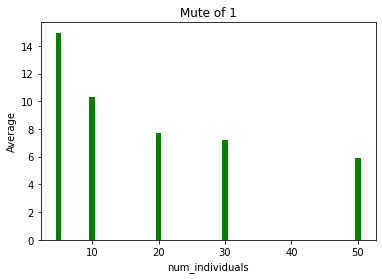

In [ ]:
from numpy.lib.function_base import average

num_individuals = [5,10,20,30,50]
num_items = 10
num_of_mutation_runs = 10
number_of_itterations = 10
for individuals in num_individuals:
  ave_list = []
  for x in range (number_of_itterations):
    genotypes = np.random.choice([0, 0], (individuals, num_items))
    fitness = np.zeros(individuals)
    fit_list = []
    for i in range(num_of_mutation_runs):
      print(i, "num of mutations")
      rand = random.sample(range(individuals), 2)
      g1 = genotypes[rand[0]]
      g2 = genotypes[rand[1]]
      pick1 = fitness_function(g1, benefits, volumes, max_volume)
      pick2 = fitness_function(g2, benefits, volumes, max_volume)
      print(g1,g2)
      print(pick1,pick2)
      if pick1 > pick2:
        g2 = copy.deepcopy(g1)
        genotypes[rand[1]],fit = mutation(1, g2)
        fit_list.append(fit)
      else:
        g1 = copy.deepcopy(g2)
        genotypes[rand[0]],fit = mutation(1, g1)
        fit_list.append(fit)
    print(fit_list, "hi")
    ave_list.append(np.average(fit_list))
    print(genotypes)
  #print(fit_list)
  print(ave_list, "\n###############")
  plt.bar(individuals, np.average(ave_list), color='green')
  plt.ylabel("Average")
  plt.xlabel("num_individuals")
  plt.title("Mute of 1")

# Spatial GA
We will now implement a spatial GA with demes, see lectures. You will to put the population of N individuals on 1D array.

Pseudocode is as follows:
1. Initialise random pop $P$ 
2. Associate each individual with a position $x$, i.e, let the position of the genotype in the population array indicate the position on a 1D grid. 
3. Pick one individual at random, i.e. genotype $G_1$ at position $x_1$ 
4. Pick a second individual $G_2$ in the local neighbourhood of the first, i.e., pick a competitor from the local neighbourhood in the range $x_1+1$ to $x_1 + k$.
5. Compare $G_1$ and $G_2$ finding a winner (W) and loser (L) 
6. Copy W over L and add a mutation insert it back to the population.
7. Until success or give up, goto 3 


> **Task** Implement the spatial GA. How do this algorithm compare to the first. Does it evolve quicker? Run several runs for fixed number of tournaments and plot a bar chart of the average fitness in different conditons. Does it get stuck in local minima more or less often? Why?

**Tips:** You can use the same structure as before for the spatial genes:


In [ ]:
num_genes = 5
num_individuals = 20 # you probably want more than 5, this is just for plotting
k = 2 # define local neighbourhood

None mutated [0 0 0 1 1 0 0 0 0 0]
Mutated [0 0 0 1 1 0 1 0 0 0]
new_fit is : 0 old_fit is: 11
None mutated [1 1 1 1 0 0 0 0 0 1]
Mutated [1 0 1 1 0 0 0 0 0 1]
new_fit is : 25 old_fit is: 0
None mutated [0 0 0 1 1 0 0 0 0 0]
Mutated [0 0 0 1 1 0 0 0 0 1]
new_fit is : 21 old_fit is: 11
None mutated [0 0 0 1 1 0 0 0 0 0]
Mutated [0 1 0 1 1 0 0 0 0 0]
new_fit is : 17 old_fit is: 11
None mutated [0 0 0 1 1 0 0 0 0 1]
Mutated [0 0 0 1 1 0 0 0 0 0]
new_fit is : 11 old_fit is: 21
None mutated [0 0 0 1 1 1 1 0 0 0]
Mutated [0 0 0 1 1 1 1 0 1 0]
new_fit is : 0 old_fit is: 0
None mutated [0 0 0 1 1 0 0 0 0 1]
Mutated [0 1 0 1 1 0 0 0 0 1]
new_fit is : 0 old_fit is: 21
None mutated [1 0 1 1 0 0 0 0 0 1]
Mutated [1 0 1 1 1 0 0 0 0 1]
new_fit is : 0 old_fit is: 25
None mutated [1 0 1 1 0 0 0 0 0 1]
Mutated [1 1 1 1 0 0 0 0 0 1]
new_fit is : 0 old_fit is: 25
None mutated [1 0 1 1 0 0 0 0 0 1]
Mutated [1 0 1 1 0 0 0 0 1 1]
new_fit is : 0 old_fit is: 25
None mutated [1 0 1 1 0 0 0 0 0 1]
Mutated [1 0 

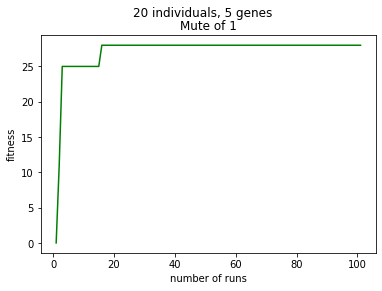

In [ ]:
from numpy.lib.function_base import average

num_individuals = [10]

num_items = 10
num_of_mutations = 1
number_of_itterations = 100
for idx, individuals in enumerate(num_individuals):
  #ave_list = []
  genotypes = np.random.choice([0, 1], (individuals, num_items))
  fitness = np.zeros(individuals)
  pop_num = num_individuals[idx]
  fit_list = [0]
  for j in range (number_of_itterations):
    for i in range(num_of_mutations):
      #print(i, "num of mutations")
      x = random.randint(0,pop_num-1)
      #print(x)
      #print(genotypes)
      local_neighbour_idx = np.random.randint(x+1, x + k)%pop_num# pick random neighbour
      #local_neighbour_gene = genotypes[local_neighbour_idx, :]
      g1 = genotypes[x]
      g2 = genotypes[local_neighbour_idx, :]
      pick1 = fitness_function(g1, benefits, volumes, max_volume)
      pick2 = fitness_function(g2, benefits, volumes, max_volume)
      #print(g1,g2, "genotypes")
      #print(pick1,pick2, "fitness")
      if pick1 > pick2 and pick1 != 0:
        g2 = copy.deepcopy(g1)
        genotypes[local_neighbour_idx],fit = mutation(1, g2)
        fit_list.append(max(fit,max(fit_list)))
      elif pick2>pick1 and pick2!=0:
        g1 = copy.deepcopy(g2)
        genotypes[x],fit = mutation(1, g1)
        fit_list.append(max(fit,max(fit_list)))
      else:
        #print('hi')
        genotypes[x],fit = mutation(1, g1)
        fit_list.append(max(fit,max(fit_list)))
      #print(genotypes)
  plt.plot([j+1 for j in range(number_of_itterations+1)], fit_list, color='green')
  plt.ylabel("fitness")
  plt.xlabel("number of runs")
  plt.title("Mute of 1")
  plt.suptitle("20 individuals, 5 genes")
    #print(fit_list, "hi")
    #ave_list.append(np.average(fit_list))



In [ ]:
fit_list

[0,
 11,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28]

In [ ]:

num_genes = 10
num_individuals = 20 # you probably want more than 5, this is just for plotting

genotypes = np.random.choice([0, 1], (num_individuals, num_items))
fitness = np.zeros(num_individuals)

print(f"All genotypes: \n{genotypes}")
print(f"Genotype 3: {genotypes[3, :]}")
print(f"Genotype 1 gene 7: {genotypes[3, 7]}")

for genotype in genotypes:
  rand_gene = random.sample(range(num_genes), 1)
  rand_indivdual = random.sample(range(num_individuals), 1)
  


All genotypes: 
[[0 1 0 1 0 1 1 0 1 1]
 [0 0 1 0 0 1 1 0 1 0]
 [1 1 0 0 1 1 1 1 0 0]
 [1 1 0 1 1 0 1 1 1 0]
 [0 1 0 1 1 0 1 1 1 0]
 [1 1 0 0 1 0 0 0 1 0]
 [1 1 1 1 0 1 0 0 0 1]
 [1 0 1 1 1 1 1 1 1 0]
 [1 0 0 1 0 1 1 0 1 0]
 [1 1 0 0 1 0 0 0 0 0]
 [0 1 0 1 1 1 0 0 1 0]
 [1 1 1 0 1 0 1 0 0 1]
 [0 1 1 0 0 1 0 1 1 0]
 [1 1 0 1 1 1 1 1 0 0]
 [1 0 1 1 0 0 0 1 1 1]
 [0 1 0 0 1 1 0 0 1 0]
 [1 1 0 1 0 1 0 0 0 1]
 [0 0 1 0 1 1 0 1 0 1]
 [0 1 1 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 1 0 0 1]]
Genotype 3: [1 1 0 1 1 0 1 1 1 0]
Genotype 1 gene 7: 1


In [ ]:
import numpy as np 

num_genes = 10
num_individuals = 50 # you probably want more than 5, this is just for plotting
k = 5 # define local neighbourhood

genotypes1 = np.random.choice([0, 1], (num_individuals, num_items))
print(genotypes1)

 


In [ ]:
rand_pop = random.randint(0,num_individuals-1)
rand_gene = random.randint(0,num_genes-1)
print(rand_gene,"gene")
print(rand_pop,"population")
# lets say I want to sample a neighbour for indivudal 3
local_neighbour_idx = np.random.randint(rand_pop+1, rand_pop + k)%num_individuals # pick random neighbour
local_neighbour_gene = genotypes1[local_neighbour_idx, :]

current_gene = genotypes1[rand_pop]
current_fit = fitness_function(current_gene, benefits, volumes, max_volume)
neighbour_fit = fitness_function(local_neighbour_gene, benefits, volumes, max_volume)
print(genotypes1[rand_pop], current_fit)
print(genotypes1[local_neighbour_idx], neighbour_fit)
if current_fit > neighbour_fit and current_fit != 0:
    local_neighbour_gene = copy.deepcopy(current_gene)
    genotypes1[local_neighbour_idx],fit = mutation(1, local_neighbour_gene)
    #it_list.append(fit)
elif neighbour_fit > current_fit and neighbour_fit != 0:
    current_gene = copy.deepcopy(local_neighbour_gene)
    genotypes1[rand_pop],fit = mutation(1, current_gene)
    #fit_list.append(fit)
print(genotypes1)



In [ ]:
import numpy as np 

num_genes = 10
num_individuals = 20 # you probably want more than 5, this is just for plotting
k = 3 # define local neighbourhood

genotypes = np.random.choice([0, 1], (num_individuals, num_items))

# lets say I want to sample a neighbour for indivudal 3
local_neighbour_idx = np.random.randint(3+1, 3 + k) # pick random neighbour 
local_neighbour_gene = genotypes[local_neighbour_idx, :]
print(local_neighbour_gene)

[0 1 1 0 0 1 1 1 1 0]


# Full microbial GA
We will now implement a spatial GA. You will to put the population of N individuals on 1D array.

Pseudocode is as follows: 
1. Initialise random pop $P$ 
2. Associate each individual with a position $x$, i.e, let the position of the genotype in the population matrix indicate the position on a 1D grid. 
3. Pick one individual at random, i.e. genotype $G_1$ at position $x_1$ 
4. Pick a second individual $G_2$ in the local neighbourhood of the first, i.e., pick a competitor from the local neighbourhood in the range $x_1+1$ to $x_1 + k$ (start with $k=2$) 5. Compare $G_1$ and $G_2$ finding a winner (W) and loser (L) 
6. Copy each gene of the winner W to the L with crossover probability (Pcrossover, say 0.5 to start) 
7. Add a mutation to the L and insert it back to the population.
8. Until success or give up, goto 3 



> **Task**  Plot the fitness of the best individual versus the number of tournaments. Run several runs for fixed number of tournaments and plot a bar chart of the average fitness in different conditons. How does this algorithm compare to the first two? Does it evolve quicker? Does it get stuck in local minima more or less often. What is the effect of crossover on the speed of evolution?


In [ ]:
num_genes = 10
num_individuals = 50 # you probably want more than 5, this is just for plotting
k = 5 # define local neighbourhood

In [ ]:
def crossover(winner, loser, probility):
  print(winner,loser,probility)
  for i in range(len(loser)):
    if probility >= random.random():
      loser[i] = winner[i]
  print(loser,"Befoore mute")
  loser,fitness = mutation(1, loser)
  print(loser,fitness,"After mute")
  return loser,fitness

In [ ]:
num_individuals = [5]
num_items = 10
for individuals in num_individuals:
  genotypes = np.random.choice([0, 1], (individuals, num_items))
  fitness = np.zeros(individuals)
  pop_num = num_individuals[idx]
genotypes2 = copy.deepcopy(genotypes)
print(genotypes2)


IndexError: ignored

In [ ]:
list_of_fit = []
for idx, genotype in enumerate(genotypes):
  list_of_fit.append(fitness_function(g1, benefits, volumes, max_volume))
print(list_of_fit)

[0, 0, 0, 0, 0]


[22, 0, 22, 24, 23]
[1 1 0 1 0 0 1 0 0 0] [0 1 0 1 0 0 1 1 0 0] 0.5
[0 1 0 1 0 0 1 1 0 0] Befoore mute
None mutated [0 1 0 1 0 0 1 1 0 0]
Mutated [0 1 0 1 0 1 1 1 0 0]
new_fit is : 0 old_fit is: 22
[0 1 0 1 0 0 1 1 0 0] 22 After mute
[[0 1 0 1 0 0 1 1 0 0]
 [1 1 0 1 0 0 1 1 0 1]
 [0 1 0 1 0 0 1 1 0 0]
 [1 1 0 1 0 0 1 0 0 0]
 [0 1 0 0 0 0 1 1 0 1]]
[1 1 0 1 0 0 1 0 0 0] [0 1 0 1 0 0 1 1 0 0] 0.5
[0 1 0 1 0 0 1 1 0 0] Befoore mute
None mutated [0 1 0 1 0 0 1 1 0 0]
Mutated [0 1 0 0 0 0 1 1 0 0]
new_fit is : 13 old_fit is: 22
[0 1 0 1 0 0 1 1 0 0] 22 After mute
[[0 1 0 1 0 0 1 1 0 0]
 [1 1 0 1 0 0 1 1 0 1]
 [0 1 0 1 0 0 1 1 0 0]
 [1 1 0 1 0 0 1 0 0 0]
 [0 1 0 0 0 0 1 1 0 1]]
[1 1 0 1 0 0 1 0 0 0] [1 1 0 1 0 0 1 1 0 1] 0.5
[1 1 0 1 0 0 1 1 0 1] Befoore mute
None mutated [1 1 0 1 0 0 1 1 0 1]
Mutated [1 0 0 1 0 0 1 1 0 1]
new_fit is : 0 old_fit is: 0
[1 1 0 1 0 0 1 1 0 1] 0 After mute
[[0 1 0 1 0 0 1 1 0 0]
 [1 1 0 1 0 0 1 1 0 1]
 [0 1 0 1 0 0 1 1 0 0]
 [1 1 0 1 0 0 1 0 0 0]
 [0 1 0 0 0 0 1

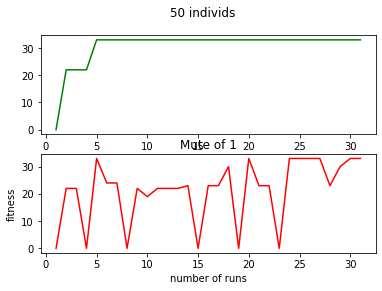

In [ ]:
from numpy.lib.function_base import average

#num_individuals = [10]

num_items = 5
num_of_mutations = 1
number_of_itterations = 30
list_of_fit = []
for idx, g in enumerate(genotypes):
  list_of_fit.append(fitness_function(g, benefits, volumes, max_volume))
print(list_of_fit)
for idx, individuals in enumerate(num_individuals):
  #ave_list = []
  #genotypes = np.random.choice([0, 1], (individuals, num_items))
  #fitness = np.zeros(individuals)
  #pop_num = num_individuals[idx]
  fit_list = [0]
  minmax_fit = [0]
  for j in range (number_of_itterations):
    for i in range(num_of_mutations):
      x = random.randint(0,pop_num-1)
      local_neighbour_idx = np.random.randint(x+1, x + k)%pop_num# pick random neighbour
      #local_neighbour_gene = genotypes[local_neighbour_idx, :]
      g1 = genotypes[x]
      g2 = genotypes[local_neighbour_idx, :]
      pick1 = fitness_function(g1, benefits, volumes, max_volume)
      pick2 = fitness_function(g2, benefits, volumes, max_volume)
      #print(g1,g2, "genotypes")
      #print(pick1,pick2, "fitness")
      if pick1 > pick2 and pick1 != 0:
        genotypes[local_neighbour_idx],fit = crossover(g1,g2,0.5)
        minmax_fit.append(fit)
        fit_list.append(max(fit,max(fit_list)))
      elif pick2>pick1 and pick2!=0:
        genotypes[x],fit = crossover(g2,g1,0.5)
        minmax_fit.append(fit)
        fit_list.append(max(fit,max(fit_list)))
      else:
        genotypes[x],fit = mutation(1, g1)
        minmax_fit.append(fit)
        fit_list.append(max(fit,max(fit_list)))
      print(genotypes)
  fig, axs = plt.subplots(2)    
  axs[0].plot([j+1 for j in range(number_of_itterations+1)], fit_list, color='green')
  plt.ylabel("fitness")
  plt.xlabel("number of runs")
  plt.title("Mute of 1")
  plt.suptitle("50 individs")
  axs[1].plot([j+1 for j in range(number_of_itterations+1)], minmax_fit, color='red')
    #print(fit_list, "hi")
    #ave_list.append(np.average(fit_list))



In [ ]:
#num_individuals = [10]

num_items = 10
num_of_mutations = 1
number_of_itterations = 20
for idx, individuals in enumerate(num_individuals):
  #ave_list = []
  #genotypes = np.random.choice([0, 1], (individuals, num_items))
  #fitness = np.zeros(individuals)
  #pop_num = num_individuals[idx]
  fit_list = [0]
  for j in range (number_of_itterations):
    for i in range(num_of_mutations):
      #print(i, "num of mutations")
      x = random.randint(0,pop_num-1)
      #print(x)
      #print(genotypes)
      local_neighbour_idx = np.random.randint(x+1, x + k)%pop_num# pick random neighbour
      #local_neighbour_gene = genotypes[local_neighbour_idx, :]
      g1 = genotypes2[x]
      g2 = genotypes2[local_neighbour_idx, :]
      pick1 = fitness_function(g1, benefits, volumes, max_volume)
      pick2 = fitness_function(g2, benefits, volumes, max_volume)
      #print(g1,g2, "genotypes")
      #print(pick1,pick2, "fitness")
      if pick1 > pick2 and pick1 != 0:
        genotypes2[local_neighbour_idx],fit = crossover(g1,g2,0.5)
        #g2 = copy.deepcopy(g1)
        #genotypes[local_neighbour_idx],fit = mutation(1, g2)
        print(fit_list, "before")
        fit_list.append(fit)
        print(fit_list, "after")
      elif pick2>pick1 and pick2!=0:
        genotypes2[x],fit = crossover(g2,g1,0.5)
        #g1 = copy.deepcopy(g2)
        #genotypes[x],fit = mutation(1, g1)
        print(fit_list, "before")
        fit_list.append(fit)
        print(fit_list, "after")
      else:
        #print('hi')
        genotypes2[x],fit = mutation(1, g1)
        fit_list.append(fit)
      print(genotypes2)
  plt.plot([j+1 for j in range(number_of_itterations+1)], fit_list, color='green')
  plt.ylabel("fitness")
  plt.xlabel("number of runs")
  plt.title("Mute of 1")
  plt.suptitle("50 individuals")
    #print(fit_list, "hi")
    #ave_list.append(np.average(fit_list))

[12, 6, 7, 1, 6, 7, 0, 7, 5, 0, 6, 6, 11, 6, 5, 6, 0, 5, 6, 11]
17
[0 1 0] [1 0 0] 0.2
[1 0 0] Befoore mute
None mutated [1 0 0]
Mutated [1 0 1]
new_fit is : 6 old_fit is: 5
[1 0 1] 6 After mute
17 5 6 -----
[12, 6, 7, 1, 6, 7, 0, 7, 5, 0, 6, 6, 11, 6, 5, 6, 0, 6, 6, 11] changes
10
None mutated [1 0 1]
Mutated [0 0 0]
new_fit is : 0 old_fit is: 6
[12, 6, 7, 1, 6, 7, 0, 7, 5, 0, 6, 6, 11, 6, 5, 6, 0, 6, 6, 11] changes
1
[0 1 0] [0 0 1] 0.2
[0 0 1] Befoore mute
None mutated [0 0 1]
Mutated [1 0 1]
new_fit is : 6 old_fit is: 1
[1 0 1] 6 After mute
1 6 6 -----
[12, 6, 7, 6, 6, 7, 0, 7, 5, 0, 6, 6, 11, 6, 5, 6, 0, 6, 6, 11] changes
5
None mutated [0 1 1]
Mutated [0 1 1]
new_fit is : 7 old_fit is: 7
[12, 6, 7, 6, 6, 7, 0, 7, 5, 0, 6, 6, 11, 6, 5, 6, 0, 6, 6, 11] changes
4
[0 1 0] [0 0 0] 0.2
[0 0 0] Befoore mute
None mutated [0 0 0]
Mutated [0 1 0]
new_fit is : 6 old_fit is: 0
[0 1 0] 6 After mute
4 6 6 -----
[12, 6, 7, 6, 6, 7, 6, 7, 5, 0, 6, 6, 11, 6, 5, 6, 0, 6, 6, 11] changes
0
[1 1 1] [

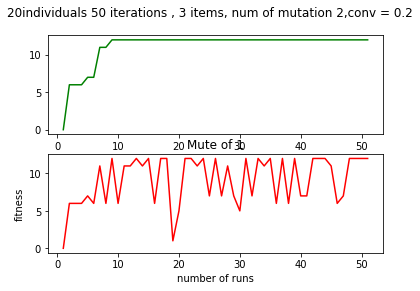

In [ ]:
num_individuals = 20

num_items = 3
num_of_mutations = 1
number_of_itterations = 50
#ave_list = []
genotypes = np.random.choice([0, 1], (num_individuals, num_items))
fitness = np.zeros(individuals)
list_of_fit = []
for idx, g in enumerate(genotypes):
  list_of_fit.append(fitness_function(g, benefits, volumes, max_volume))
print(list_of_fit)
fit_list = [0]
minmax_fit = [0]
for j in range (number_of_itterations):
  for i in range(num_of_mutations):
    x = random.randint(0,num_individuals-1)
    print(x)
    local_neighbour_idx = np.random.randint(x+1, x + k)%num_individuals# pick random neighbour
    #local_neighbour_gene = genotypes[local_neighbour_idx, :]
    g1 = genotypes[x]
    g2 = genotypes[local_neighbour_idx, :]
    pick1 = fitness_function(g1, benefits, volumes, max_volume)
    pick2 = fitness_function(g2, benefits, volumes, max_volume)
    #print(g1,g2, "genotypes")
    #print(pick1,pick2, "fitness")
    if pick1 > pick2 and pick1 != 0:
      genotypes[local_neighbour_idx],fit = crossover(g1,g2,0.2)
      minmax_fit.append(fit)
      fit_list.append(max(fit,max(fit_list)))
      if list_of_fit[local_neighbour_idx] < fit:
        print(x, list_of_fit[x], fit, "-----")
        list_of_fit[local_neighbour_idx] = fit
    elif pick2>pick1 and pick2!=0:
      genotypes[x],fit = crossover(g2,g1,0.2)
      minmax_fit.append(fit)
      fit_list.append(max(fit,max(fit_list)))
      if list_of_fit[x] < fit:
        print(x, list_of_fit[x], fit, "-----")
        list_of_fit[x] = fit
    else:
      genotypes[x],fit = mutation(2, g1)
      minmax_fit.append(fit)
      fit_list.append(max(fit,max(fit_list)))
      if list_of_fit[x] < fit:
        print(x, list_of_fit[x], fit, "-----")
        list_of_fit[x] = fit
    print(list_of_fit, "changes")
fig, axs = plt.subplots(2)    
axs[0].plot([j+1 for j in range(number_of_itterations+1)], fit_list, color='green')
plt.ylabel("fitness")
plt.xlabel("number of runs")
plt.title("Mute of 1")
plt.suptitle("20individuals 50 iterations , 3 items, num of mutation 2,conv = 0.2")
axs[1].plot([j+1 for j in range(number_of_itterations+1)], minmax_fit, color='red')
    #print(fit_list, "hi")
    #ave_list.append(np.average(fit_list))

[12, 12, 12, 12, 12, 7, 12, 12, 12, 7, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


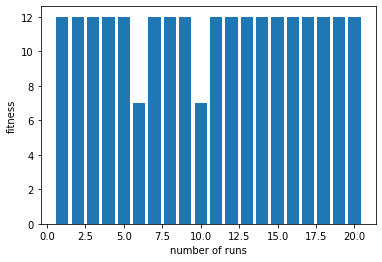

In [ ]:
print(list_of_fit)
plt.bar([j+1 for j in range(num_individuals)],list_of_fit)
plt.ylabel("fitness")
plt.xlabel("number of runs")
plt.show()




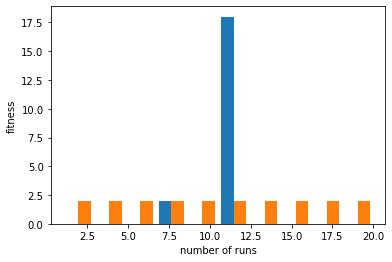

In [ ]:

plt.hist((list_of_fit,[j+1 for j in range(num_individuals)]), bins = 10)
plt.ylabel("fitness")
plt.xlabel("number of runs")
plt.show()

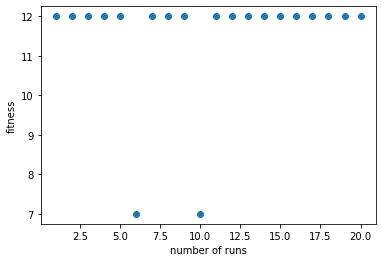

In [ ]:
plt.scatter([j+1 for j in range(num_individuals)],list_of_fit)
plt.ylabel("fitness")
plt.xlabel("number of runs")
plt.show()